<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220514.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regression
* PCA

In [79]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
import sklearn.datasets as skd
import plotnine as gg
from plotnine import ggplot, aes

# regression

In [9]:
#@title 기본 제목 텍스트
raw = dict(zip(sns.get_dataset_names(), [sns.load_dataset(a) for a in sns.get_dataset_names()]))
raw.keys()

dict_keys(['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic'])

In [10]:
d1 = raw['titanic']
d1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
d2 = d1[['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class']]
d2.head()

,survived,sex,age,sibsp,parch,fare,embarked,class
0,0,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,1,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,0,male,35.0,0,0,8.0500,S,Third


In [12]:
d2 = d2.assign(fam = d2['sibsp'] + d2['parch'] + 1)
d2.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,fam
0,0,male,22.0,1,0,7.2500,S,Third,2
1,1,female,38.0,1,0,71.2833,C,First,2
2,1,female,26.0,0,0,7.9250,S,Third,1
3,1,female,35.0,1,0,53.1000,S,First,2
4,0,male,35.0,0,0,8.0500,S,Third,1


In [16]:
d2 = d2.assign(fam_size = lambda x : np.select([x.age > 4, x.age > 2, x.age > 0], ['large', 'small', 'alone']))
d2.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,fam,fam_size
0,0,male,22.0,1,0,7.2500,S,Third,2,large
1,1,female,38.0,1,0,71.2833,C,First,2,large
2,1,female,26.0,0,0,7.9250,S,Third,1,large
3,1,female,35.0,1,0,53.1000,S,First,2,large
4,0,male,35.0,0,0,8.0500,S,Third,1,large


In [18]:
d2['embarked'] = d2['embarked'].fillna(d2['embarked'].mode()[0])

In [22]:
d2 = d2.drop(['sibsp', 'parch', 'fam'], axis = 1)
d2.head()

,survived,sex,age,fare,embarked,class,fam_size
0,0,male,22.0,7.2500,S,Third,large
1,1,female,38.0,71.2833,C,First,large
2,1,female,26.0,7.9250,S,Third,large
3,1,female,35.0,53.1000,S,First,large
4,0,male,35.0,8.0500,S,Third,large


In [24]:
d3 = pd.get_dummies(d2, columns = ['sex', 'embarked', 'class', 'fam_size'])
d3.head()

,survived,age,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,fam_size_0,fam_size_alone,fam_size_large,fam_size_small
0,0,22.0,7.2500,0,1,0,0,1,0,0,1,0,0,1,0
1,1,38.0,71.2833,1,0,1,0,0,1,0,0,0,0,1,0
2,1,26.0,7.9250,1,0,0,0,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,1,0,0,0,1,1,0,0,0,0,1,0
4,0,35.0,8.0500,0,1,0,0,1,0,0,1,0,0,1,0


In [25]:
s1 = d3['age']

In [28]:
imputer = KNNImputer(n_neighbors=3)
d5 = pd.DataFrame(imputer.fit_transform(d3), columns = d3.columns)
d5.head()

,survived,age,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,fam_size_0,fam_size_alone,fam_size_large,fam_size_small
0,0.0,22.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,38.0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,26.0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,35.0,53.1000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,35.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
s2 = pd.DataFrame(np.c_[np.arange(len(s1)).reshape(-1,1), 
                   s1.values.reshape(-1,1),
                   d5['age'].values.reshape(-1,1).astype(int)
                   ],
             columns = ['idx', 's1', 'knn']
             )
s2.head()

,idx,s1,knn
0,0.0,22.0,22.0
1,1.0,38.0,38.0
2,2.0,26.0,26.0
3,3.0,35.0,35.0
4,4.0,35.0,35.0


In [38]:
s2 = pd.melt(s2, id_vars = 'idx')
s2.head()

,idx,variable,value
0,0.0,s1,22.0
1,1.0,s1,38.0
2,2.0,s1,26.0
3,3.0,s1,35.0
4,4.0,s1,35.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


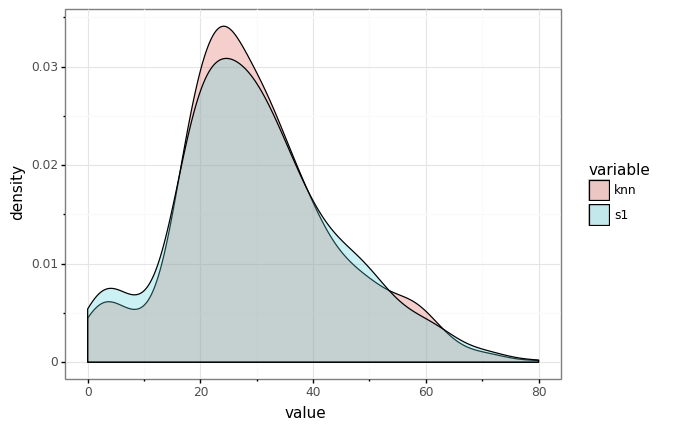

<ggplot: (8737757766125)>

In [41]:
(
    ggplot(s2, aes('value', fill = 'variable')) +
    gg.geom_density(alpha = .3) +
    gg.theme_bw()
)

In [42]:
d5.isnull().sum()

survived          0
age               0
fare              0
sex_female        0
sex_male          0
embarked_C        0
embarked_Q        0
embarked_S        0
class_First       0
class_Second      0
class_Third       0
fam_size_0        0
fam_size_alone    0
fam_size_large    0
fam_size_small    0
dtype: int64

In [44]:
x = d5[['age', 'fare', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'class_First', 'class_Second',
       'class_Third', 'fam_size_0', 'fam_size_alone', 'fam_size_large',
       'fam_size_small']]
y = d5['survived']

In [45]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [46]:
fit_rf = RandomForestClassifier().fit(x_tr,y_tr)
pred_rf = fit_rf.predict(x_te)
fit_rf.score(x_tr, y_tr), fit_rf.score(x_te, y_te)

(0.9903691813804173, 0.8097014925373134)

In [50]:
proba_rf = fit_rf.predict_proba(x_te)

In [53]:
roc_auc_score(y_te, proba_rf[:, -1])

0.8683078972868217

In [56]:
fprs, tprs, threshold = roc_curve(y_te, proba_rf[:, -1])

No handles with labels found to put in legend.


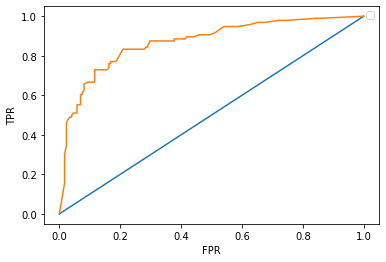

In [59]:
plt.plot([0,1],[0,1])
plt.plot(fprs, tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# PCA

In [63]:
a1 = raw['penguins']
a1.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [67]:
a1 = a1[~a1['sex'].isnull()]
a1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [68]:
a1.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [69]:
a1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [70]:
fit_scale = StandardScaler().fit_transform(a1[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']])

In [74]:
a2 = pd.DataFrame(np.c_[a1[['species', 'island','sex']].values, fit_scale], 
             columns = ['species', 'island','sex',
                        'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']
             )
a2.head()

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,Male,-0.896042,0.780732,-1.426752,-0.568475
1,Adelie,Torgersen,Female,-0.822788,0.119584,-1.069474,-0.506286
2,Adelie,Torgersen,Female,-0.67628,0.424729,-0.426373,-1.190361
3,Adelie,Torgersen,Female,-1.335566,1.085877,-0.569284,-0.941606
4,Adelie,Torgersen,Male,-0.859415,1.747026,-0.783651,-0.692852


In [76]:
a3 = pd.get_dummies(a2, columns = ['island', 'sex'])
a3.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,-0.896042,0.780732,-1.426752,-0.568475,0,0,1,0,1
1,Adelie,-0.822788,0.119584,-1.069474,-0.506286,0,0,1,1,0
2,Adelie,-0.67628,0.424729,-0.426373,-1.190361,0,0,1,1,0
3,Adelie,-1.335566,1.085877,-0.569284,-0.941606,0,0,1,1,0
4,Adelie,-0.859415,1.747026,-0.783651,-0.692852,0,0,1,0,1


In [77]:
a3.columns

Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_Female', 'sex_Male'],
      dtype='object')

In [80]:
x = a3[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen',
       'sex_Female', 'sex_Male']]
y = a3['species']

In [81]:
fit_pca = PCA(n_components = 8)

In [83]:
x_ = fit_pca.fit_transform(x)

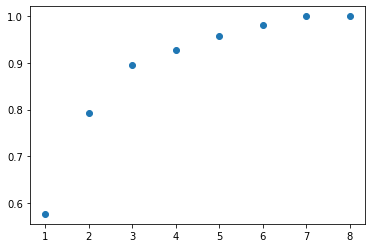

In [86]:
plt.plot(range(1,9), fit_pca.explained_variance_ratio_.cumsum(), 'o')

In [92]:
tbl_pca = pd.DataFrame(np.c_[x_, y], columns = [f'pc{a}' for a in range(1,9)] + ['species'])
tbl_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,species
0,-1.813932,0.441274,-0.896716,0.32488,0.264115,-0.913897,0.276112,0.0,Adelie
1,-1.451861,-0.714206,-0.209805,0.667983,-0.167415,-0.447534,0.614474,0.0,Adelie
2,-1.516771,-0.518871,0.036957,1.024737,-0.408977,-0.189918,-0.186064,-0.0,Adelie
3,-1.995127,-0.324122,-0.618425,0.957595,-0.60428,0.208492,0.05146,0.0,Adelie
4,-1.876324,1.105772,-1.061624,0.73021,-0.121036,-0.249652,-0.094851,0.0,Adelie


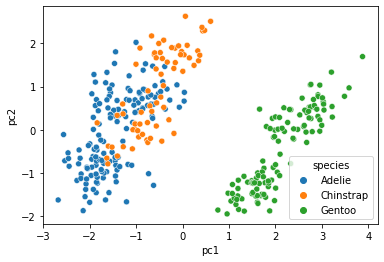

In [93]:
sns.scatterplot(data = tbl_pca, x = 'pc1', y  = 'pc2', hue = 'species')